<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#Transformations" data-toc-modified-id="Transformations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transformations</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Test</a></span></li></ul></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Training-Set-Univariate-Analysis" data-toc-modified-id="Training-Set-Univariate-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Training Set Univariate Analysis</a></span></li><li><span><a href="#Multivariate-analysis" data-toc-modified-id="Multivariate-analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Multivariate analysis</a></span><ul class="toc-item"><li><span><a href="#Exploring-the-relationships-in-greater-detail" data-toc-modified-id="Exploring-the-relationships-in-greater-detail-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Exploring the relationships in greater detail</a></span></li></ul></li></ul></li><li><span><a href="#Testing-accuracy-on-a-simple-logistic" data-toc-modified-id="Testing-accuracy-on-a-simple-logistic-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing accuracy on a simple logistic</a></span></li><li><span><a href="#Using-Sci-kit-learn-to-build-and-test-performance-of-different-models" data-toc-modified-id="Using-Sci-kit-learn-to-build-and-test-performance-of-different-models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Using Sci-kit learn to build and test performance of different models</a></span><ul class="toc-item"><li><span><a href="#Train-holdout-split" data-toc-modified-id="Train-holdout-split-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Train holdout split</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#Ensembling-the-models" data-toc-modified-id="Ensembling-the-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ensembling the models</a></span><ul class="toc-item"><li><span><a href="#Predict-on-test" data-toc-modified-id="Predict-on-test-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Predict on test</a></span></li></ul></li><li><span><a href="#Stacking-the-models" data-toc-modified-id="Stacking-the-models-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Stacking the models</a></span><ul class="toc-item"><li><span><a href="#Predict-on-test" data-toc-modified-id="Predict-on-test-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Predict on test</a></span></li></ul></li></ul></div>

In [1]:
import statsmodels.api as sm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

# Problem Statement
In this problem we are given a dataset to predict the likelihood of someone surviving on the titanic. The result is a binary variable of either surviving or not. 

Measurement of success: Predicting on the test dataset correctly whether the person survived the Titanic or not

We have 9 variables:
- Pclass: A proxy for socio-economic status (1st = Upper, 2nd = Middle, 3rd = Lower)
- Name
- Sex
- Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- Ticket: Looks like some sort of letter number combination? Not sure if it'll be useful
- Fare
- Cabin: a number with NaN as null?
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


# Data Load

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Transformations

### Training
Here we are creating a few variables. `Child` is created based on a definition of "child" historically.

`Has_cabin` is created because it seems like a cabin number is assigned only if they have a cabin.

`Title_Cleaned` is the name of their title- Mr, Mrs., etc. 

`Has_Age` just says whether they have a valid age or not.

In [5]:
titles = train_data['Name'].str.findall(r', [\w\s]*\.')

train_data['Title'] = [re.findall('[\w\s]*',x[0])[1] for x in titles]

In [6]:
train_data['Child'] = train_data['Age'] <= 14
train_data['Has_Cabin'] = [1 if pd.isnull(x) != True else 0 for x in train_data['Cabin']]
train_data_title_grouped = train_data.groupby('Title',as_index=False).agg({'Survived':'mean','Age':'max','PassengerId':'count'})
high_titles = train_data_title_grouped.loc[train_data_title_grouped['PassengerId'] >= 10]['Title']

train_data['Title_Cleaned'] = ['Other' if x not in list(high_titles) else x for x in train_data['Title']]

train_data['Has_Age'] = ~train_data['Age'].isnull()

In [7]:
train_data_dummies = pd.get_dummies(data=train_data,columns = ['Pclass','Sex','Embarked'])

In [8]:
train_data_dummies.head(1)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,...,Title_Cleaned,Has_Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,NaN,Mr,...,Mr,True,0,0,1,0,1,0,0,1


In [9]:
train_data_dummies['Age_Impute'] = [np.mean(train_data_dummies['Age']) if pd.isnull(x) else x for x in train_data_dummies['Age']]

### Test

In [10]:
test_data['Child'] = test_data['Age'] <= 14
test_data['Has_Cabin'] = [1 if pd.isnull(x) != True else 0 for x in test_data['Cabin']]
titles = test_data['Name'].str.findall(r', [\w\s]*\.')

test_data['Title'] = [re.findall('[\w\s]*',x[0])[1] for x in titles]
test_data['Title_Cleaned'] = ['Other' if x not in list(high_titles) else x for x in test_data['Title']]

In [11]:
test_data['Has_Age'] = ~test_data['Age'].isnull()

In [12]:
test_data_dummies = pd.get_dummies(data=test_data,columns = ['Pclass','Sex','Embarked'])

# EDA

## Training

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Child,Has_Cabin,Title_Cleaned,Has_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,0,Mr,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False,1,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,0,Miss,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,False,1,Mrs,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False,0,Mr,True


In [14]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Child,Has_Cabin,Title_Cleaned,Has_Age
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev,False,0,Other,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss,False,1,Miss,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss,False,0,Miss,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr,False,1,Mr,True
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr,False,0,Mr,True


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Title          891 non-null    object 
 13  Child          891 non-null    bool   
 14  Has_Cabin      891 non-null    int64  
 15  Title_Cleaned  891 non-null    object 
 16  Has_Age        891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(7)
memory usa

Datatypes are what I would expect

In [16]:
train_data.isnull().mean()

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245
Title            0.000000
Child            0.000000
Has_Cabin        0.000000
Title_Cleaned    0.000000
Has_Age          0.000000
dtype: float64

looks like 20% of Age has some nulls, as well as 80 % of Cabin. The 2 embarked is weird.

In [17]:
train_data.duplicated().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Count'>

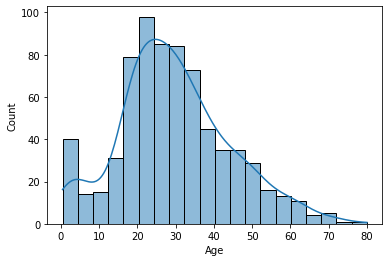

In [18]:
sns.histplot(train_data['Age'].dropna(),kde=True)

Seems like there's a significant bump in the 0 region for age

Based on https://www.encyclopedia-titanica.org/children-on-titanic/, it looks like 14 is the age cutoff to be considered a child. This could be a field that's added to the training and test dataset. 

In [19]:
[display(train_data[x].value_counts()) if train_data[x].dtype == 'object' else np.nan for x in train_data]

Calderhead, Mr. Edward Pennington    1
Johnson, Master. Harold Theodor      1
Morrow, Mr. Thomas Rowan             1
Lang, Mr. Fang                       1
Sivic, Mr. Husein                    1
                                    ..
McNamee, Mr. Neal                    1
Kent, Mr. Edward Austin              1
Elias, Mr. Dibo                      1
Vande Walle, Mr. Nestor Cyriel       1
Ling, Mr. Lee                        1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

347082        7
1601          7
CA. 2343      7
CA 2144       6
3101295       6
             ..
348123        1
13567         1
A/5. 13032    1
349209        1
14311         1
Name: Ticket, Length: 681, dtype: int64

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
D              3
              ..
D47            1
B86            1
B42            1
B50            1
D48            1
Name: Cabin, Length: 147, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Lady              1
 Ms                1
 Capt              1
 Jonkheer          1
 the Countess      1
 Sir               1
 Don               1
 Mme               1
Name: Title, dtype: int64

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Other       27
Name: Title_Cleaned, dtype: int64

[nan,
 nan,
 nan,
 None,
 None,
 nan,
 nan,
 nan,
 None,
 nan,
 None,
 None,
 None,
 nan,
 nan,
 None,
 nan]

Looks like Name and Ticket and Cabin are kinda useless in their current state. We know that cabin has nulls, so maybe the nulls means that they weren't assigned a cabin? How many of these nulls are in test? Looks like a decent number as well. 80% are null. Perhaps we could make a variable that says whether it's cabin or no cabin

In [20]:
train_data['Child'] = train_data['Age'] <= 14
train_data['Has_Cabin'] = [1 if pd.isnull(x) != True else 0 for x in train_data['Cabin']]

I'm wondering if there is a way to use the name data. Looks like there is a way to get their title out from the name using Regex. It seems like it's always between the comma and the period. It seems like there's a Mr., Mrs., Master, and Miss

In [21]:
train_data.groupby('Title',as_index=False).agg({'Survived':'mean','Age':'max','PassengerId':'count'})

,Title,Survived,Age,PassengerId
0,Capt,0.000000,70.0,1
1,Col,0.500000,60.0,2
2,Don,0.000000,40.0,1
3,Dr,0.428571,54.0,7
4,Jonkheer,0.000000,38.0,1
5,Lady,1.000000,48.0,1
6,Major,0.500000,52.0,2
7,Master,0.575000,12.0,40
8,Miss,0.697802,63.0,182
9,Mlle,1.000000,24.0,2


Looking at the title list, it might not be all that helpful. Mrs. and Miss definitely can tell us if they're married, and Master seems to only be counted for males under 12? Maybe this means that children were only considered under 12? Also, I think I will make all of the <10 ones 'Other'. Hmm maybe there's some help in last names too

In [22]:
train_data_title_grouped = train_data.groupby('Title',as_index=False).agg({'Survived':'mean','Age':'max','PassengerId':'count'})
high_titles = train_data_title_grouped.loc[train_data_title_grouped['PassengerId'] >= 10]['Title']

train_data['Title_Cleaned'] = ['Other' if x not in list(high_titles) else x for x in train_data['Title']]

## Training Set Univariate Analysis

In [23]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Everything looks fine. I'll probably make Pclass a dummy variable. Also should be noted that the average "Survived" is 38%

In [24]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

It looks like most people were poor. Surprisingly the upper class outnumber the middle class.

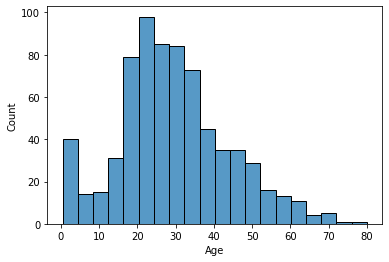

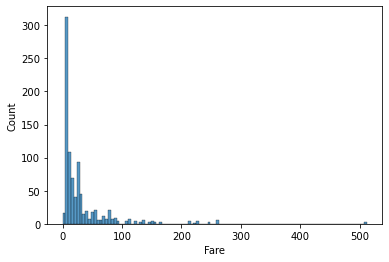

In [25]:
for x in train_data.select_dtypes('float'):
    sns.histplot(x=x,data=train_data)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

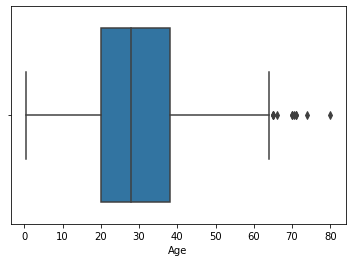

In [27]:
sns.boxplot(train_data['Age'])

I want to understand why the 0 bin seemingly has more people relative to what I would understand people aged to be at 0. Is this a lot of newborns?

In [28]:
train_data.loc[train_data['Age'] <= 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Child,Has_Cabin,Title_Cleaned,Has_Age
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Master,True,0,Master,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,Miss,True,1,Miss,True
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Master,True,0,Master,True
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,Miss,True,0,Miss,True
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S,Miss,True,0,Miss,True
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,Master,True,0,Master,True
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Master,True,0,Master,True
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S,Miss,True,0,Miss,True
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,Master,True,0,Master,True
171,172,0,3,"Rice, Master. Arthur",male,4.00,4,1,382652,29.1250,NaN,Q,Master,True,0,Master,True


I guess there were just a lot of children on this cruise

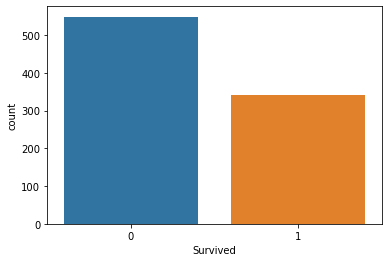

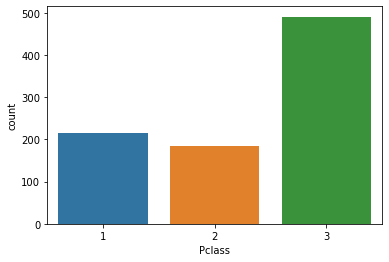

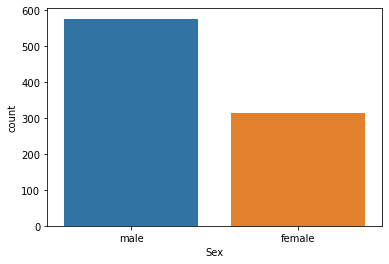

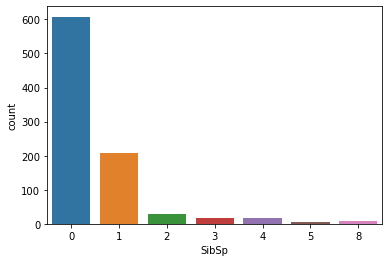

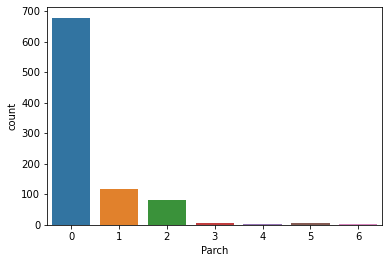

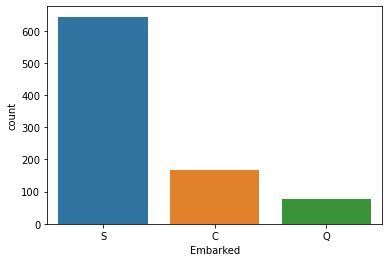

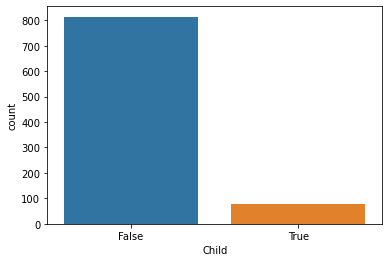

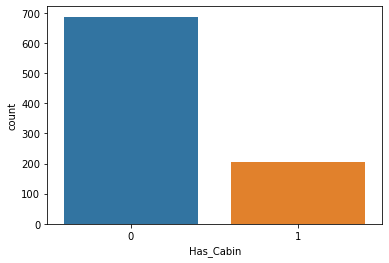

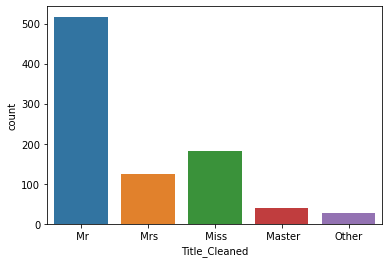

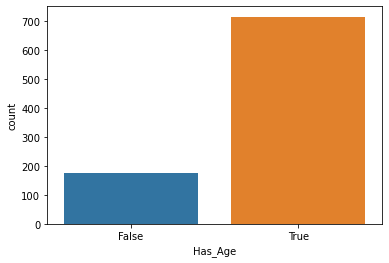

In [29]:
for var in ['Survived','Pclass','Sex','SibSp','Parch','Embarked','Child','Has_Cabin','Title_Cleaned','Has_Age']:
    sns.countplot(x=var,data=train_data)
    plt.show()
    plt.close()

## Multivariate analysis

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Child,Has_Cabin,Title_Cleaned,Has_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,0,Mr,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False,1,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,0,Miss,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,False,1,Mrs,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False,0,Mr,True


<AxesSubplot:>

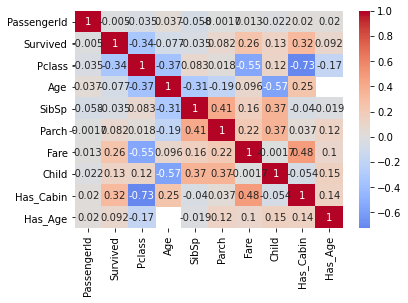

In [31]:
sns.heatmap(train_data.corr(),annot=True, cmap="coolwarm",center=0)

It looks like there's significant negative correlation between Pclass and Has Cabin, which in this context means that the people that have cabins probably are higher class. 

It also seems like there's a pretty strong positive correlation between Fare and Has_Cabin, which means that the higher the fare, the more likely they are to have a cabin.

Age and Child are negatively correclated, which makes sense since I created Child as anyone under age 14. 

Fare and Pclass are negatively correlated, which means that the less you pay the more likely you are to be a lower social class. 

Interestingly, Survived has a decently high correlation with Pclass, Fare, and Has_Cabin. These variables are also highly correlated with each other, so I'm wondering if there will be a lot of collinearity introduced by having all 3 of these in the model. 

Also interestingly, it seems that Age has a moderately negative correlation between Pclass and SibSp. That means the younger you are, the more likely you are to be of a higher social class. Also, the older you are, the less likely you are to have siblings or spouses on the ship. (which makes sense, since younger children can have multiple siblings but older people are most likely to only have 1 spouse or no spouse.)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

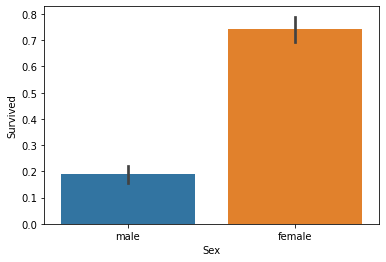

In [32]:
sns.barplot(x='Sex',y='Survived',data=train_data)

### Exploring the relationships in greater detail

<AxesSubplot:xlabel='Survived', ylabel='Age'>

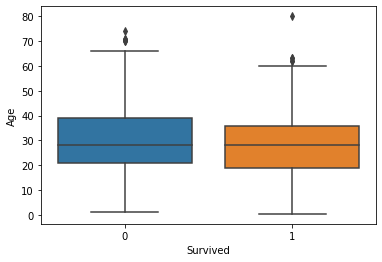

In [33]:
sns.boxplot(x=train_data['Survived'],y=train_data['Age'])

Surprisingly, the median age of the people that survived and that didn't are very similar. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

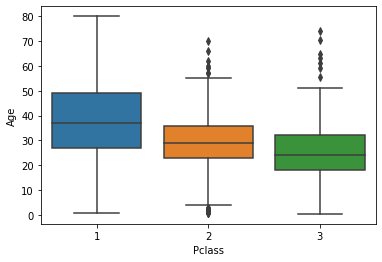

In [34]:
sns.boxplot(x=train_data['Pclass'],y=train_data['Age'])

It seems that the age gets lower as the social class gets lower. Meaning younger people tended to be middle or lower class. 

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

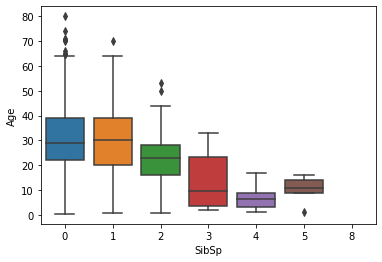

In [35]:
sns.boxplot(x=train_data['SibSp'],y=train_data['Age'])

The titles I think correspond to the number of each respective gender aboard the titanic.

# Testing accuracy on a simple logistic

In [36]:
train_data_dropna = train_data_dummies.dropna()

In [37]:
y = train_data_dropna[['Survived']]

X = train_data_dropna[['Age','SibSp','Parch','Fare','Child','Has_Cabin','Pclass_1','Pclass_2','Sex_female','Embarked_C','Embarked_Q']]

X = sm.add_constant(X)

logistic = sm.Logit(endog =  y.astype('float'),exog = X.astype('float'),missing='drop')

res = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.429363
         Iterations 7


In [38]:
## Doing logistic again with imputed variables
y = train_data_dummies[['Survived']]

X = train_data_dummies[['Age_Impute','SibSp','Parch','Fare','Child','Has_Cabin','Has_Age','Pclass_1','Pclass_2','Sex_female','Embarked_C','Embarked_Q']]

X = sm.add_constant(X)

logistic1 = sm.Logit(endog =  y.astype('float'),exog = X.astype('float'),missing='drop')

res1 = logistic1.fit()

Optimization terminated successfully.
         Current function value: 0.429244
         Iterations 6


In [39]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  185
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                           10
Date:                Sat, 24 Jul 2021   Pseudo R-squ.:                  0.3186
Time:                        20:30:04   Log-Likelihood:                -79.432
converged:                       True   LL-Null:                       -116.57
Covariance Type:            nonrobust   LLR p-value:                 6.605e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0310      0.016     -1.903      0.057      -0.063       0.001
SibSp          0.1284      0.358      0.359      0.720      -0.573       0.830
Parch         -0.5542      0.343     -1.616      0.106      -1.226       0.118
Fare           0.0021      0.003      0.670      0.503      -0.004       0.008
Child          1.2533      1.117      1.123      0.262      -0.935       3.442
Has_Cabin     -0.7971      1.025     -0.778      0.437      -2.806       1.211
Pclass_1       1.5922      0.943      1.689      0.091      -0.255       3.440
Pclass_2       1.4364      1.160      1.239      0.215      -0.836       3.709
Sex_female     3.0421      0.519      5.860      0.000       2.025       4.060
Embarked_C     0.4119      0.450      0.915      0.360      -0.471       1.294
Embarked_Q    -1.5026      1.977     -0.760      0.447      -5.378       2.373
==============================================================================
"""

With this initial simple analysis, we see that the most predictive variables are Gender and Age. Since we dropped a lot of columns, this might not be a representative dataset, and none of the others are really that significant.

In [40]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      878
Method:                           MLE   Df Model:                           12
Date:                Sat, 24 Jul 2021   Pseudo R-squ.:                  0.3554
Time:                        20:30:04   Log-Likelihood:                -382.46
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.356e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8341      0.368     -4.985      0.000      -2.555      -1.113
Age_Impute    -0.0226      0.009     -2.424      0.015      -0.041      -0.004
SibSp         -0.4313      0.125     -3.455      0.001      -0.676      -0.187
Parch         -0.2286      0.129     -1.769      0.077      -0.482       0.025
Fare           0.0029      0.003      1.105      0.269      -0.002       0.008
Child          1.4142      0.459      3.080      0.002       0.514       2.314
Has_Cabin      0.8653      0.339      2.554      0.011       0.201       1.529
Has_Age        0.1066      0.259      0.411      0.681      -0.401       0.615
Pclass_1       1.3610      0.398      3.416      0.001       0.580       2.142
Pclass_2       1.1244      0.243      4.621      0.000       0.648       1.601
Sex_female     2.7677      0.206     13.427      0.000       2.364       3.172
Embarked_C     0.4618      0.246      1.879      0.060      -0.020       0.944
Embarked_Q     0.4916      0.353      1.394      0.163      -0.199       1.183
==============================================================================
"""

With the whole dataset and using imputation to create Age, we see that Age and Gender are still very predictive. But now, we see that Pclass is also very predictive. This leads me to believe that the people without age might be biased, in that people with worse Pclass is less likely to have an age. In addition, it seems that being a child or having a cabin really raises your chances of survival. 

# Using Sci-kit learn to build and test performance of different models

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [43]:
from sklearn.model_selection import cross_validate

In [44]:
from sklearn.metrics import plot_roc_curve

In [45]:
from sklearn.metrics import plot_precision_recall_curve

In [46]:
from sklearn.metrics import plot_confusion_matrix

In [47]:
from sklearn.model_selection import GridSearchCV

## Train holdout split

In [48]:
y = train_data_dummies['Survived']

In [49]:
X = train_data_dummies[['Age','SibSp','Parch','Fare','Child','Has_Cabin','Has_Age','Pclass_1','Pclass_2','Sex_female','Embarked_C','Embarked_Q']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression


In [52]:
logistic = LogisticRegression()

In [53]:
log_pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean'))
                    ,('Scaler',StandardScaler())
                     ,('Logistic',logistic)
                    ])

In [54]:
cross_validate(log_pipe,X_train,y_train,scoring=['roc_auc','precision','recall'])

{'fit_time': array([0.03151488, 0.01651502, 0.01899934, 0.01899934, 0.03300023]),
 'score_time': array([0.0109992 , 0.01251435, 0.01200104, 0.01599979, 0.02100039]),
 'test_roc_auc': array([0.86724927, 0.84217645, 0.84545262, 0.81375874, 0.88089226]),
 'test_precision': array([0.76923077, 0.78723404, 0.79166667, 0.68181818, 0.82      ]),
 'test_recall': array([0.74074074, 0.68518519, 0.71698113, 0.56603774, 0.75925926])}

Seems to performn decently well, with one fold that performs drastically worse than the others

In [55]:
log_pipe.fit(X_train,y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('Logistic', LogisticRegression())])

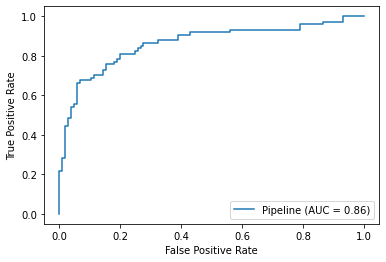

In [56]:
plot_roc_curve(log_pipe, X_test, y_test)

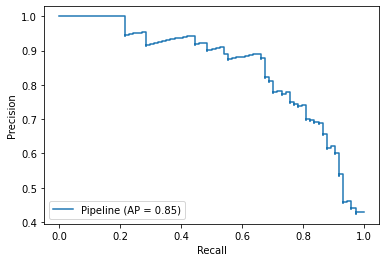

In [57]:
plot_precision_recall_curve(log_pipe, X_test, y_test)

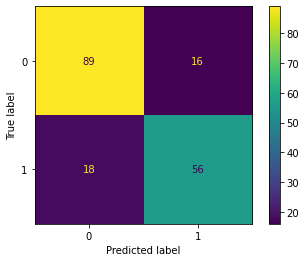

In [58]:
plot_confusion_matrix(log_pipe, X_test, y_test)

The metrics all look pretty good- high AUC, good precision vs. recall tradeoff, and low misclassifications

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dec_tree = DecisionTreeClassifier()

In [61]:
dec_pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean'))
                    ,('Scaler',StandardScaler())
                     ,('DecTree',dec_tree)
                    ])

In [62]:
dec_params = [{'DecTree__max_depth':[3,5,15]
              ,'DecTree__max_leaf_nodes':[15,25,35]
              ,'DecTree__min_samples_leaf':[11,21,31]}
             ]

In [63]:
dec_grid_search = GridSearchCV(dec_pipe,dec_params,cv=5, scoring='roc_auc')

In [64]:
GridSearchCV?

In [65]:
dec_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Imputer', SimpleImputer()),
                                       ('Scaler', StandardScaler()),
                                       ('DecTree', DecisionTreeClassifier())]),
             param_grid=[{'DecTree__max_depth': [3, 5, 15],
                          'DecTree__max_leaf_nodes': [15, 25, 35],
                          'DecTree__min_samples_leaf': [11, 21, 31]}],
             scoring='roc_auc')

In [66]:
dec_grid_search.best_params_

{'DecTree__max_depth': 5,
 'DecTree__max_leaf_nodes': 35,
 'DecTree__min_samples_leaf': 21}

In [67]:
dec_tree = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=15,min_samples_leaf=21)

In [68]:
dec_pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean'))
                    ,('Scaler',StandardScaler())
                     ,('DecTree',dec_tree)
                    ])

In [69]:
cross_validate(dec_pipe,X_train,y_train,scoring=['roc_auc','precision','recall'])

{'fit_time': array([0.01099825, 0.01199937, 0.01199913, 0.01100063, 0.00899839]),
 'score_time': array([0.01000023, 0.0110023 , 0.01300144, 0.00999761, 0.01300097]),
 'test_roc_auc': array([0.87307532, 0.84644195, 0.81831673, 0.84354463, 0.8582702 ]),
 'test_precision': array([0.87878788, 0.82978723, 0.6440678 , 0.76923077, 0.79591837]),
 'test_recall': array([0.53703704, 0.72222222, 0.71698113, 0.56603774, 0.72222222])}

In [70]:
dec_pipe.fit(X_train,y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('DecTree',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                                        min_samples_leaf=21))])

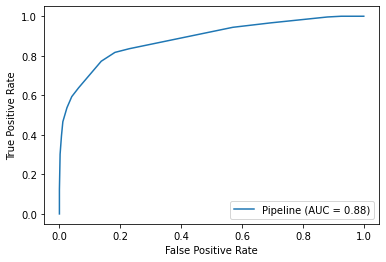

In [71]:
plot_roc_curve(dec_pipe,X_train,y_train)

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rand_forest = RandomForestClassifier()

In [74]:
forest_pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean'))
                    ,('Scaler',StandardScaler())
                     ,('RandForest',rand_forest)
                    ])

In [75]:
forest_params = [{'RandForest__max_depth':[3,5,15]
              ,'RandForest__max_leaf_nodes':[15,25,35]
              ,'RandForest__min_samples_leaf':[1,11,21]}
             ]

In [76]:
forest_grid = GridSearchCV(forest_pipe,forest_params,cv=5,scoring='roc_auc')

In [77]:
forest_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Imputer', SimpleImputer()),
                                       ('Scaler', StandardScaler()),
                                       ('RandForest',
                                        RandomForestClassifier())]),
             param_grid=[{'RandForest__max_depth': [3, 5, 15],
                          'RandForest__max_leaf_nodes': [15, 25, 35],
                          'RandForest__min_samples_leaf': [1, 11, 21]}],
             scoring='roc_auc')

In [78]:
forest_grid.best_params_

{'RandForest__max_depth': 15,
 'RandForest__max_leaf_nodes': 35,
 'RandForest__min_samples_leaf': 1}

In [79]:
rand_forest = RandomForestClassifier(max_depth=15,max_leaf_nodes=25,min_samples_leaf=1)
forest_pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean'))
                    ,('Scaler',StandardScaler())
                     ,('RandForest',rand_forest)
                    ])

In [80]:
cross_validate(forest_pipe,X_train,y_train,scoring=['roc_auc','precision','recall'])

{'fit_time': array([0.23000121, 0.2149992 , 0.19099879, 0.17899919, 0.20200157]),
 'score_time': array([0.03800035, 0.0318737 , 0.0340004 , 0.02900338, 0.03899765]),
 'test_roc_auc': array([0.87723679, 0.85216396, 0.83633665, 0.85637057, 0.88888889]),
 'test_precision': array([0.82222222, 0.80851064, 0.8       , 0.79069767, 0.80487805]),
 'test_recall': array([0.68518519, 0.7037037 , 0.67924528, 0.64150943, 0.61111111])}

In [81]:
forest_pipe.fit(X_train,y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('RandForest',
                 RandomForestClassifier(max_depth=15, max_leaf_nodes=25))])

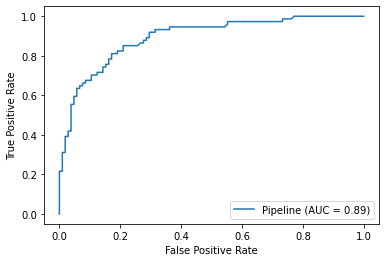

In [82]:
plot_roc_curve(forest_pipe,X_test,y_test)

## SVM

In [83]:
from sklearn.svm import SVC

In [85]:
svc = SVC(probability=True)

In [86]:
svc_pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean'))
                    ,('Scaler',StandardScaler())
                     ,('SVC',svc)
                    ])

In [87]:
svc_params = [{'SVC__kernel':['linear', 'poly', 'rbf', 'sigmoid']}]

In [88]:
svc_grid = GridSearchCV(svc_pipe,svc_params,cv=5,scoring='roc_auc')

In [89]:
svc_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Imputer', SimpleImputer()),
                                       ('Scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid=[{'SVC__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='roc_auc')

In [90]:
svc_grid.best_params_

{'SVC__kernel': 'rbf'}

In [91]:
cross_validate(svc_pipe,X_train,y_train,scoring=['roc_auc','precision','recall'])

{'fit_time': array([0.05699849, 0.04899836, 0.06100059, 0.05599999, 0.04899716]),
 'score_time': array([0.01300025, 0.01699877, 0.01299906, 0.01099777, 0.01200175]),
 'test_roc_auc': array([0.89076155, 0.83801498, 0.80941276, 0.80421878, 0.88194444]),
 'test_precision': array([0.91891892, 0.82978723, 0.79166667, 0.83333333, 0.82      ]),
 'test_recall': array([0.62962963, 0.72222222, 0.71698113, 0.56603774, 0.75925926])}

In [92]:
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('SVC', SVC(probability=True))])

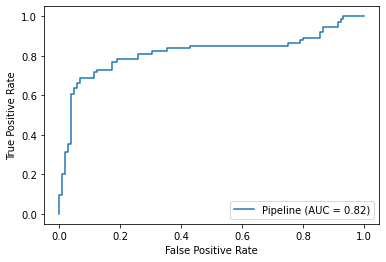

In [93]:
plot_roc_curve(svc_pipe,X_test,y_test)

The SVC doesn't look too great...

## Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
nb = GaussianNB()

In [96]:
nb_pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean'))
                    ,('Scaler',StandardScaler())
                     ,('NB',nb)
                    ])

In [97]:
cross_validate(nb_pipe,X_train,y_train,scoring=['roc_auc','precision','recall'])

{'fit_time': array([0.00899935, 0.00999951, 0.01299834, 0.0090003 , 0.01200008]),
 'score_time': array([0.00999975, 0.00799894, 0.01199818, 0.01199961, 0.01099873]),
 'test_roc_auc': array([0.8460258 , 0.81970454, 0.82340471, 0.80761077, 0.74074074]),
 'test_precision': array([0.73584906, 0.76470588, 0.70909091, 0.70833333, 0.66666667]),
 'test_recall': array([0.72222222, 0.72222222, 0.73584906, 0.64150943, 0.62962963])}

In [98]:
nb_pipe.fit(X_train,y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('NB', GaussianNB())])

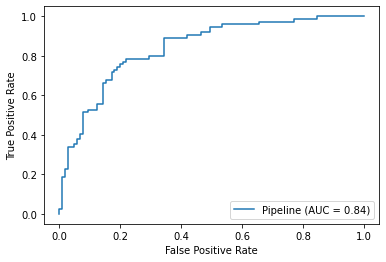

In [99]:
plot_roc_curve(nb_pipe,X_test,y_test)

Hmm not as good as the other ones

## XGBoost

In [100]:
import xgboost as xgb

In [117]:
xgboost = xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')

In [118]:
xgb_pipe = Pipeline([('Imputer',SimpleImputer(missing_values=np.nan,strategy='mean'))
                    ,('Scaler',StandardScaler())
                     ,('XGB',xgboost)
                    ])

In [119]:
cross_validate(xgb_pipe,X_train,y_train,cv=5,scoring=['roc_auc','precision','recall'])

{'fit_time': array([0.14299703, 0.12600017, 0.14504147, 0.12100005, 0.13803458]),
 'score_time': array([0.02100205, 0.01799917, 0.01899815, 0.01800036, 0.02000022]),
 'test_roc_auc': array([0.84935497, 0.84155223, 0.85859657, 0.86675853, 0.85606061]),
 'test_precision': array([0.79166667, 0.71186441, 0.75510204, 0.73076923, 0.79245283]),
 'test_recall': array([0.7037037 , 0.77777778, 0.69811321, 0.71698113, 0.77777778])}

In [120]:
xgb_pipe.fit(X_train,y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='mlogloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                         

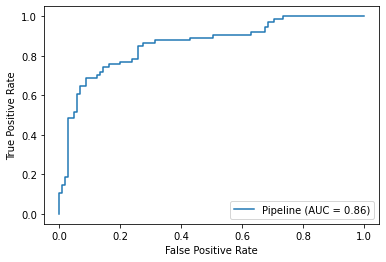

In [121]:
plot_roc_curve(xgb_pipe,X_test,y_test)

Seems pretty decent

# Ensembling the models

In [122]:
from sklearn.ensemble import VotingClassifier

In [123]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_pipe)
                , ('dt', dec_pipe)
                , ('rf', forest_pipe)
                ,('nb',nb_pipe)
                ,('xgb',xgb_pipe)
                ,('svc',svc_pipe)
               ],
    voting='soft')

In [124]:
cross_validate(voting_clf,X_train,y_train,scoring=['roc_auc','precision','recall'])

{'fit_time': array([0.46251011, 0.49702907, 0.48057961, 0.46410918, 0.4519999 ]),
 'score_time': array([0.08200121, 0.08500147, 0.08100057, 0.07599998, 0.07700014]),
 'test_roc_auc': array([0.88951311, 0.85445277, 0.85880856, 0.85912656, 0.88994108]),
 'test_precision': array([0.86046512, 0.78431373, 0.79591837, 0.77777778, 0.83673469]),
 'test_recall': array([0.68518519, 0.74074074, 0.73584906, 0.66037736, 0.75925926])}

In [125]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('Imputer', SimpleImputer()),
                                              ('Scaler', StandardScaler()),
                                              ('Logistic',
                                               LogisticRegression())])),
                             ('dt',
                              Pipeline(steps=[('Imputer', SimpleImputer()),
                                              ('Scaler', StandardScaler()),
                                              ('DecTree',
                                               DecisionTreeClassifier(max_depth=5,
                                                                      max_leaf_nodes=15,
                                                                      min_samples_leaf=21))])),
                             ('rf',
                              Pipeline(steps=[('Imputer', Simple...
                                                             m

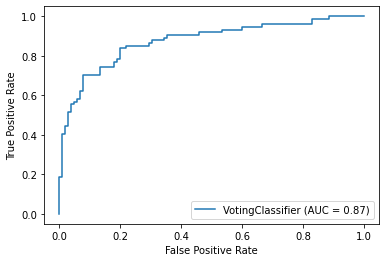

In [126]:
plot_roc_curve(voting_clf,X_test,y_test)

## Predict on test

In [127]:
voting_clf.fit(X,y)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('Imputer', SimpleImputer()),
                                              ('Scaler', StandardScaler()),
                                              ('Logistic',
                                               LogisticRegression())])),
                             ('dt',
                              Pipeline(steps=[('Imputer', SimpleImputer()),
                                              ('Scaler', StandardScaler()),
                                              ('DecTree',
                                               DecisionTreeClassifier(max_depth=5,
                                                                      max_leaf_nodes=15,
                                                                      min_samples_leaf=21))])),
                             ('rf',
                              Pipeline(steps=[('Imputer', Simple...
                                                             m

In [128]:
test_data['Survived'] = voting_clf.predict(test_data_dummies[['Age','SibSp','Parch','Fare','Child','Has_Cabin','Has_Age','Pclass_1','Pclass_2','Sex_female','Embarked_C','Embarked_Q']])

In [129]:
test_data[['PassengerId','Survived']].to_csv('ensemble_predictions.csv',index=False)

# Stacking the models

In [130]:
from sklearn.ensemble import StackingClassifier

In [131]:
stacking = StackingClassifier(estimators=[('lr', log_pipe)
                , ('dt', dec_pipe)
                , ('rf', forest_pipe)
                ,('nb',nb_pipe)
                ,('xgb',xgb_pipe)
                ,('svc',svc_pipe)
               ],)

In [132]:
cross_validate(stacking,X_train,y_train,cv=5,scoring=['roc_auc','precision','recall'])

{'fit_time': array([2.6955452 , 2.609128  , 2.67016697, 2.58047605, 2.56964278]),
 'score_time': array([0.07899809, 0.10399961, 0.08005738, 0.07599998, 0.07764006]),
 'test_roc_auc': array([0.89429879, 0.85736579, 0.86347255, 0.83835065, 0.89478114]),
 'test_precision': array([0.85714286, 0.75925926, 0.76470588, 0.76744186, 0.81632653]),
 'test_recall': array([0.66666667, 0.75925926, 0.73584906, 0.62264151, 0.74074074])}

In [133]:
stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('lr',
                                Pipeline(steps=[('Imputer', SimpleImputer()),
                                                ('Scaler', StandardScaler()),
                                                ('Logistic',
                                                 LogisticRegression())])),
                               ('dt',
                                Pipeline(steps=[('Imputer', SimpleImputer()),
                                                ('Scaler', StandardScaler()),
                                                ('DecTree',
                                                 DecisionTreeClassifier(max_depth=5,
                                                                        max_leaf_nodes=15,
                                                                        min_samples_leaf=21))])),
                               ('rf',
                                Pipeline(steps=[('Imputer', Simp...
                                    

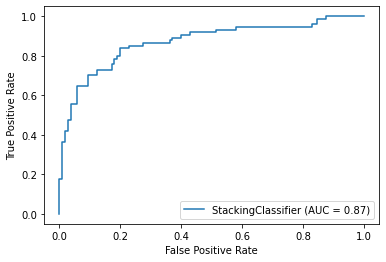

In [134]:
plot_roc_curve(stacking,X_test,y_test)

## Predict on test

In [135]:
stacking.fit(X,y)

StackingClassifier(estimators=[('lr',
                                Pipeline(steps=[('Imputer', SimpleImputer()),
                                                ('Scaler', StandardScaler()),
                                                ('Logistic',
                                                 LogisticRegression())])),
                               ('dt',
                                Pipeline(steps=[('Imputer', SimpleImputer()),
                                                ('Scaler', StandardScaler()),
                                                ('DecTree',
                                                 DecisionTreeClassifier(max_depth=5,
                                                                        max_leaf_nodes=15,
                                                                        min_samples_leaf=21))])),
                               ('rf',
                                Pipeline(steps=[('Imputer', Simp...
                                    

In [136]:
test_data['Survived'] = stacking.predict(test_data_dummies[['Age','SibSp','Parch','Fare','Child','Has_Cabin','Has_Age','Pclass_1','Pclass_2','Sex_female','Embarked_C','Embarked_Q']])

In [137]:
test_data[['PassengerId','Survived']].to_csv('ensemble_predictions2.csv',index=False)